# 0 - Préparation de l'environnement de travail

Q1) Depuis un dossier TP2 sur votre Google Drive, créez un notebook, sur GoogleColab, nommé tp2_IA    

# I - Préparation de données

Q2) Créez une section intitulée I- Préparation de données

### 0 - Téléchargement de données

Q3) Créez un titre intitulé 0-Téléchargement de données

Q4) Contrairement au TP1 où la base de données était dans un fichier CSV, dans le présent TP vous allez charger une base de données directement via une fonction de la bibliothèque Scikit-Learn. Cette fonction est nommée "fetch_openml" et elle existe dans le sous-module datasets du module sklearn. Utilisez cette fonction pour charger, dans une variable, la version 1 (version=1) de la base de données nommée "mnist_784" comme suit :

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

Cette base de données est constituée de petites images représentant des chiffres écrits à la main. Elle est considérée comme le "hello world !" de la classification


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


###     1 - Informations sur les données

Q5) Créez un titre intitulé 1- Informations sur les données

Q6) Le retour de la fonction "fetch_openml" est un dictionnaire (la variable mnist). Pour afficher ses clés, utilisez la fonction "keys()"


In [ ]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


Q7) En utilisant les clés du dictionnaire "mnist" :

a) Stockez dans une variable "X" les données. Utilisez la clé "data".
Affichez La taille des données (le nombre des features et la taille de chaque feature) via l'attribut shape.

In [ ]:
X= mnist.data
X.shape


(70000, 784)

b) Stockez dans une variable "Y" les classes. Utilisez la clé "target".

In [ ]:
Y= mnist.target


c) Affichez le nombre d'instance classée via l'attribut shape

In [ ]:
Y.shape


(70000,)

d) Affichez, les différentes classes de la base de données. Pour ce faire, utilisez la fonction "unique" du module "numpy"

In [ ]:
import numpy as np

print(np.unique(Y))


['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


e) Une description détaillée de la base de données. Pour ce faire, utilisez la clé "DESCR"

In [ ]:
#mnist.DESCR
print(mnist["DESCR"])


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Q8) A travers la question 7, vous avez dû conclure que la base de données MNIST contient 70 000 images en niveau de gris, et chaque image est caractérisée par un features de taille 784 =28*28. En effet, la taille des images est 28x28 pixels et chaque pixel contient des valeurs entre 0 (blanc) à 255 (noir). Chaque image a été aplatie.

a) Affichez la première instance de la base de données. Pour ce faire :

i) utilisez l'attribut "values" du dictionnaire X tout en ajoutant l'indice "0"

In [ ]:
print(X.values[0])


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

ii) pensez à la redimensionner, via la fonction "reshape" de numpy, en taille "28,28"

In [ ]:
reshaped = X.values[0].reshape(28, 28)
print (reshaped)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

iii) utilisez la fonction "imshow" du sous-module pyplot du module matplotlib. Pour avoir un affichage au niveau de gris de l'image, ajoutez "import matplotlib as mpl" et puis "cmap=mpl.cm.binary" comme deuxième argument de la fonction "imshow". De quel chiffre s'agit-t-il ?

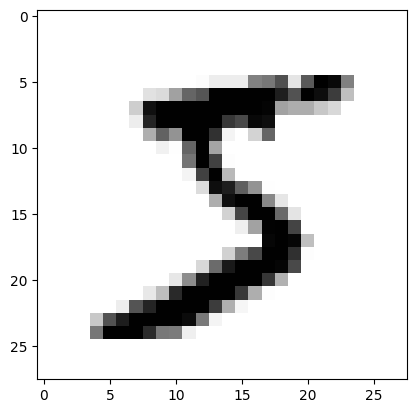

In [ ]:
# Affichage de l'image en niveau de gris
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.imshow(reshaped, cmap=mpl.cm.binary)
plt.show()


Je pense reconnaître un 5.

b) Affichez la classe réelle (souhaitée) de la première instance

c) Affichez le type (avec la fonction "type") de la première instance

In [ ]:
#b) Affichage de la classe réelle (souhaitée) de la première instance
print("Classe réelle de la première instance :", Y[0])

#c) Affichage du type de la première instance
print("Type de la première instance :", type(X.values[0]))

Classe réelle de la première instance : 5
Type de la première instance : <class 'numpy.ndarray'>


Q9) A travers la question 9, vous avez dû remarquer que le type des labels est une chaîne de caractères. Il est préférable, dans les projets d'apprentissage automatique, d'utiliser des valeurs numériques. Par conséquent, appliquez le casting sur les labels via le code suivant :
Y = Y.astype(np.uint8)

In [ ]:
Y=Y.astype(np.uint8)

###  2 - Répartition des données

Q10) Créez un titre, intitulé 2- Répartition des données

Q11) Répartissez les données de la base de données MNIST comme suit tout en stockant les données de test/d'apprentissage et les classes de test/d'apprentissage dans 4 variables. Ce code peut se faire en une seule ligne et sans boucles en python (lien utile) :

a) Les 60 000 premières images composeront la base d'apprentissage

b) Le reste des images constitue la base de test.


In [ ]:
#Q11)
#a) b) Répartition des données en apprentissage et test

#X_train, X_test = X[:60000], X[60000:]
#Y_train, Y_test = Y[:60000], Y[60000:]
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

# Affichage des tailles des ensembles d'apprentissage et de test
print("Taille de la base d'apprentissage (X_train) :", X_train.shape)
print("Taille de la base de test (X_test) :", X_test.shape)
print("Taille des classes d'apprentissage (Y_train) :", Y_train.shape)
print("Taille des classes de test (Y_test) :", Y_test.shape)

Taille de la base d'apprentissage (X_train) : (60000, 784)
Taille de la base de test (X_test) : (10000, 784)
Taille des classes d'apprentissage (Y_train) : (60000,)
Taille des classes de test (Y_test) : (10000,)


# II - Apprentissage d'un classifieur multi-classes

Comme indiqué dans les objectifs, ce TP vise à classifier les chiffres. Dans cette partie, nous allons apprendre un classifieur à classifier les 10 classes (les chiffres de 0 à 9) de la base de données MNIST

Q12) Créez un titre, avec une grande taille de police, intitulé III- Apprentissage d'un classifieur multi-classes


### 1 - Apprentissage des données

Q13) Créez un titre, intitulé 2- Apprentissage des données

Q14) Pour l'apprentissage des données, nous allons utiliser le classifieur Stochastic Gradient Descent (SGD). Pour ce faire :

a) créez un objet de la classe SGDClassifier de Scikit-Learn. Cette classe est à importer du sous-module linear_model du module Scikit-Learn


In [ ]:
#Q14)
#a) Importation de la classe SGDClassifier
from sklearn.linear_model import SGDClassifier

# Création de l'objet SGDClassifier
sgd_clf = SGDClassifier()


b) appliquez la méthode fit sur cet objet en donnant comme arguments les données d'apprentissages et leurs labels (ceux de la question 11)

In [ ]:
#b) Entraînement du modèle sur les données d'apprentissage
sgd_clf.fit(X_train, Y_train)


SGDClassifier()

Q15) En utilisant le modèle d'apprentissage bâti, prédisez en utilisant le code ci-dessous la classe de la première instance de la base de données (celle de la question 8-b). La prédiction va être, un chiffre de 0 à 9 :

sgd_clf.predict([X.values[0]])


In [ ]:
# Prédiction de la classe de la première instance
prediction = sgd_clf.predict([X.values[0]])

print("Prédiction de la classe de la première instance :", prediction)


Prédiction de la classe de la première instance : [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Q16) En utilisant l'objet qui instancie la classe SGDClassifier :

a) affichez, via la méthode "decision_function", les 10 scores de décision utilisés par la méthode SGD pour classifier la première instance de la base de donnée ainsi que la position de leur max en utilisant numpy.argmax. Qu'est ce que vous remarquez ?

In [ ]:
# a) Affichage des scores de décision et de la classe prédite
decision_scores = sgd_clf.decision_function([X.values[0]])
predicted_class_index = np.argmax(decision_scores)
print("Scores de décision pour la première instance :", decision_scores, "\n")
print("Position du score maximum :", predicted_class_index, "\n")


Scores de décision pour la première instance : [[-13024.29769552 -41002.83928788 -10076.2234361     299.54808406
  -26948.32542047  -1040.2074587  -27797.85493734 -26076.72938007
   -7929.41639741 -12035.41266336]] 

Position du score maximum : 3 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


La position du score le plus élevé est la valeur que le modèle estime etre le plus probable, dans notre cas : 5, la deuxième plus probable selon le modèle est 3. Il y a une part d'aléatoire dans l'entrainement et donc je peux avoir des résultats faux.

b) affichez, via l'attribut "classes_", les différentes classes utilisées par le classifieur.


In [ ]:
# b) Affichage des différentes classes utilisées par le classifieur
classes_used = sgd_clf.classes_
print("Classes utilisées par le classifieur :", classes_used)


Classes utilisées par le classifieur : [0 1 2 3 4 5 6 7 8 9]


### 2 - Evaluation du modèle d'apprentissage sur les données   d'apprentissage

Q17) Créez un titre, intitulé 2- Evaluation du modèle d'apprentissage sur les données   d'apprentissage

#### 2 -1 - Taux de classification

Q18) Créez un titre 2-1- Taux de classification

Q19) Evaluez SGD en utilisant la méthode 3-fold cross-validation. Pour ce faire, utilisez la fonction "cross_val_score" du sous-module "model_selection" du module "sklearn". Optez pour la valeur "accuracy" pour l'argument "scoring" et affichez :

a) le taux de classification (accuracy) de chaque fold

b) la moyenne des taux de classification


In [ ]:
from sklearn.model_selection import cross_val_score

# Calcul des taux de classification avec 3-fold cross-validation
scores = cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

# a) Affichage du taux de classification de chaque fold
print("Taux de classification de chaque fold :", scores)

# b) Affichage de la moyenne des taux de classification
print("Moyenne des taux de classification :", scores.mean())


Taux de classification de chaque fold : [0.8648  0.87585 0.87485]
Moyenne des taux de classification : 0.8718333333333333


Q20) Une des techniques d'amélioration des taux de classification est le "scaling" (mise à l'échelle). Vérifiez ceci en appliquant une standardisation sur les données d'apprentissage comme suit :

a) Instancez un objet de la classe StandardScaler (ce n'est pas une méthode de classification). Cette classe est à importer du sous-module "preprocessing" du module "sklearn". Elle permet de transformer un feature en un autre qui suit la loi normale (Gaussian Distribution)

b) Appliquez, sur cet objet, la méthode "fit_transform" avec les données d'apprentissage comme argument  

c) Évaluez le classifieur SGD sur les nouvelles données en utilisant  une validation croisée de type 3-fold cross validation. En comparant le taux de classification moyen des 3 folds, les résultats sont-ils meilleurs que ceux de la question 19 ?


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# a) Instanciation de l'objet StandardScaler
scaler = StandardScaler()

# b) Application de la méthode fit_transform sur les données d'apprentissage
X_train_scaled = scaler.fit_transform(X_train)

# c) Évaluation du classifieur SGD sur les nouvelles données avec une validation croisée 3-fold
# Création d'un pipeline pour combiner la standardisation et le classifieur SGD
pipeline = make_pipeline(StandardScaler(), sgd_clf)

# Calcul des taux de classification avec 3-fold cross-validation
scores_scaled = cross_val_score(pipeline, X_train, Y_train, cv=3, scoring="accuracy")

# Affichage du taux de classification moyen des 3 folds
print("Taux de classification moyen après standardisation :", scores_scaled.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Taux de classification moyen après standardisation : 0.9002333333333333


#### 2 -2 - Matrice de confusion

Q21) Créez un titre 2-2- Matrice de confusion

Q22) En utilisant le modèle déjà construit du classifieur SGD, prédisez les classes des données d'apprentissage. Pour ce faire, utilisez la fonction "cross_val_predict" du sous-module "model_selection" du module "sklearn". Optez pour une validation croisée de type 3-fold cross validation. Cette fonction, contrairement à "cross_val_score", retourne les prédictions (0, …., 9)


In [ ]:
from sklearn.model_selection import cross_val_predict

# Prédiction des classes avec 3-fold cross-validation
predicted_train = cross_val_predict(sgd_clf, X_train, Y_train, cv=3)

# Affichage du nombre de prédictions
print("Nombre de prédictions :", len(predicted_train))


Nombre de prédictions : 60000


In [ ]:
print(predicted_train)

[5 0 4 ... 5 6 8]


Q23)

a) Affichez la matrice de confusion du modèle d'apprentissage ainsi. Pour ce faire, utilisez la fonction " ConfusionMatrixDisplay " du sous-module "metrics" du module "sklearn". Comme arguments, utilisez les classes réelles et les classes prédites. La taille de la matrice de confusion, est 10x10 car on traite un problème de classification de 10 classes.

b) Affichez la version normalisée de la matrice de confusion. Pour ce faire ajoutez l’argument normalize="true" à la fonction " ConfusionMatrixDisplay ". Vous pouvez également spécifier l'argument values_format=".0%" pour afficher les pourcentages sans décimales.

c) Qu'est-ce que vous remarquez à propos de la classe 5 et 8 ?


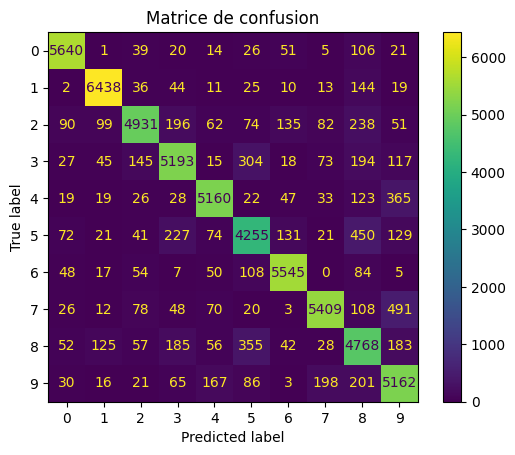

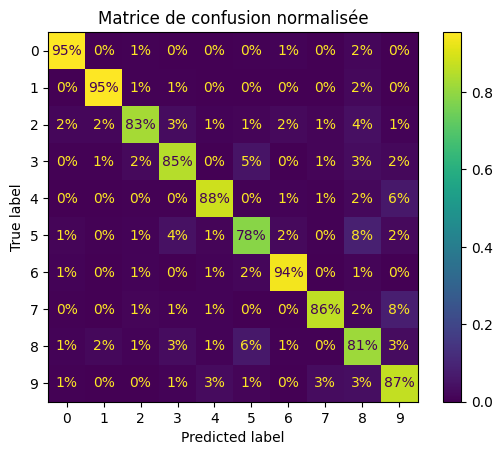

In [ ]:
#

#### 2 -2 - Précision et rappel

Q24) Créez un titre 2-3- Précision et rappel

Q25) Calculez la précision, le rappel et le score F1 du modèle d'apprentissage en utilisant les fonctions "precision_score" et "recall_score" et "f1_score" du sous-module "metrics" du module "sklearn". Interprétez les résultats.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcul de la précision
precision = precision_score(Y_train, predicted_train, average='weighted')

# Calcul du rappel
recall = recall_score(Y_train, predicted_train, average='weighted')

# Calcul du score F1
f1 = f1_score(Y_train, predicted_train, average='weighted')

# Affichage des résultats
print("Précision :", precision)
print("Rappel :", recall)
print("Score F1 :", f1)


Précision : 0.8774209326310961
Rappel : 0.8750166666666667
Score F1 : 0.8755341462242756


# III - Classification multi-label

Dans quelques cas, le classifieur doit affecter plusieurs classes à une instance.

Q26) Créez un titre, avec une grande taille de police, intitulé IV- Classification multi-label

Q27) Suivez les étapes suivantes pour créer un vecteur multi-label

a) Ecrivez un code qui stocke dans une variable True si les labels de la base d'apprentissage sont supérieurs à 7 et False sinon

b) Ecrivez un code qui stocke dans une variable True si les labels de la base d'apprentissage sont impaires

c) Concaténez les deux vecteurs via la fonction "c_" du module numpy


In [ ]:
import numpy as np

# a) Stockage dans une variable True si les labels sont supérieurs à 7, False sinon
labels_sup_7 = (Y_train > 7)

# b) Stockage dans une variable True si les labels sont impairs
labels_impairs = (Y_train % 2 != 0)

# c) Concaténation des deux vecteurs
multi_label_vector = np.c_[labels_sup_7, labels_impairs]

# Affichage des premières valeurs du vecteur multi-label
print("Premières valeurs du vecteur multi-label :\n", multi_label_vector[:10])


Premières valeurs du vecteur multi-label :
 [[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [False  True]
 [False  True]
 [False  True]
 [False False]]


Q28) Dans cette partie, vous allez utiliser la méthode de classification K-plus proche voisin vu qu'elle supporte la classification multi label :

a) Créez un objet de la classe KNeighborsClassifier. Cette classe existe dans le sous-module neighbors du module sklearn

b) Appliquez la méthode fit sur l'objet déjà créé en donnant comme argument la base d'apprentissage et le vecteur multi-label

c) Via le modèle d'apprentissage bâti, prédisez la classe de la première instance de la base de données (celle de la question 9). La prédiction va être, cette fois-ci, un vecteur de deux labels et chaque label est binaire (False ou True). La prédiction était correcte ?


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# a) Création de l'objet KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# b) Entraînement du modèle sur la base d'apprentissage et le vecteur multi-label
knn_clf.fit(X_train, multi_label_vector)

# c) Prédiction de la classe de la première instance de la base de données
prediction_multi_label = knn_clf.predict([X.values[0]])

# Affichage de la prédiction
print("Prédiction de la classe de la première instance (vecteur multi-label) :", prediction_multi_label)


Prédiction de la classe de la première instance (vecteur multi-label) : [[False  True]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Q29) Pour tester le modèle d'apprentissage, vous pouvez utiliser une validation croisée et un des scores de la classification : taux de classification, precision, recall ou F1_score … .

Vous n'êtes pas censé faire cette étape vu que ça va nécessiter un temps chronophage de calcul.  

# IV - Classification multi-output

La classification multi-output est une généralisation de la classification multi-label. Autrement dit, chaque label peut être multi-classe (le label aura plus que deux valeurs possibles). L'objectif de cette partie est de faire apprendre au classifieur à supprimer le bruit d'une image. L'input va être une image bruitée et l'output va être une image sans bruit représentée par un tableau des intensités de pixels (des valeurs de 0 à 255), d'où l'aspect multi-output de la classification. Dans ce cas, l'input et l'output auront la même taille.

Q30) Créez un titre, avec une grande taille de police, intitulé V- Classification multi-output

Q31) Ajoutez du bruit aux images d'apprentissage en suivant les étapes suivantes :

a) Créez un vecteur de bruit qui a la longueur de la base d'apprentissage comme suit :
noise_train = np.random.randint(0, 100, (len(X_train), 784))

b) Ajoutez ce bruit avec une simple addition à la base d'apprentissage


In [ ]:
import numpy as np

# a) Création d'un vecteur de bruit
noise_train = np.random.randint(0, 100, (len(X_train), 784))

# b) Ajout du bruit à la base d'apprentissage
X_train_noisy = X_train + noise_train


Q32) Ajoutez du bruit aux images de test en suivant les étapes suivantes :

a) Créez un vecteur de bruit qui a la longueur de la base de test comme suit :
noise_train = np.random.randint(0, 100, (len(X_test), 784))

b) Ajoutez ce bruit avec une simple addition à la base de test


In [ ]:
#Q32)
# a) Création d'un vecteur de bruit pour la base de test
noise_test = np.random.randint(0, 100, (len(X_test), 784))

# b) Ajout du bruit à la base de test
X_test_noisy = X_test + noise_test


Q33) Créez une variable qui va contenir les labels de la base d'apprentissage, à savoir les image d'apprentissage non bruitées

In [ ]:
Y_train_clean = Y_train

Q34) Créez une variable qui va contenir les labels de la base de test, à savoir les images de test non bruitées

In [ ]:
Y_test_clean = Y_test

Q35) Affichez une image bruitée ainsi que sa version non-bruitée via le code suivant :

import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_test_mod[0]

y_some_digit = y_test_mod[0]

some_digit_image = some_digit.reshape(28, 28)

y_some_digit_image = y_some_digit.reshape(28, 28)

plt.subplot(121)

plt.imshow(some_digit_image, cmap=mpl.cm.binary)

plt.axis("off")

plt.subplot(122)

plt.imshow(y_some_digit_image, cmap=mpl.cm.binary)

plt.axis("off")

plt.show()


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt


 # X_test_mod contient la base de test bruitée
some_digit = X_test_noisy[0]
 # y_test_mod contient les labels de la base de test (images de test non bruitée)
y_some_digit = Y_test[0]
some_digit_image = some_digit.reshape(28, 28)
y_some_digit_image = y_some_digit.reshape(28, 28)
plt.subplot(121)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.subplot(122)
plt.imshow(y_some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()


KeyError: 0

Q36) En utilisant la méthode de k-plus proches voisins :

a) Faites un apprentissage sur les images d'apprentissage bruitées. Deux arguments doivent être fournis à la méthode "fit" : les images d'apprentissage bruitées (instances) et leurs version non-bruitée (labels=classes)

b) Prédisez la classe (sous forme de vecteurs) de la première instance de la base de test. Ensuite :

i) affichez les valeurs du vecteur

ii) affichez ce vecteur sous forme d'image pour vérifier si le débruitage était bien fait. Pour ce faire, pensez à redimensionner l'image


In [1]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# a) Apprentissage sur les images d'apprentissage bruitées
knn_clf_noisy = KNeighborsClassifier()
knn_clf_noisy.fit(X_train_noisy, Y_train_clean)

# b) Prédiction de la classe de la première instance de la base de test
prediction_first_instance = knn_clf_noisy.predict([X_test_noisy[0]])

# i) Affichage des valeurs du vecteur prédit
print("Vecteur prédit pour la première instance de la base de test :", prediction_first_instance)

# ii) Affichage du vecteur prédit sous forme d'image
image_first_instance = X_test_noisy[0].reshape(28, 28)
plt.imshow(image_first_instance, cmap='binary')
plt.axis("off")
plt.show()


NameError: name 'X_train_noisy' is not defined